**Applying K- Means Clustering to the mall Customers data**

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv(r"C:\Users\Karth\Downloads\Machine learning\Datasets\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df1 = df.drop('CustomerID', axis=1)

In [9]:
df1.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
df1['Gender'].replace({"Male":0,"Female":1}, inplace= True)

In [12]:
df1.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

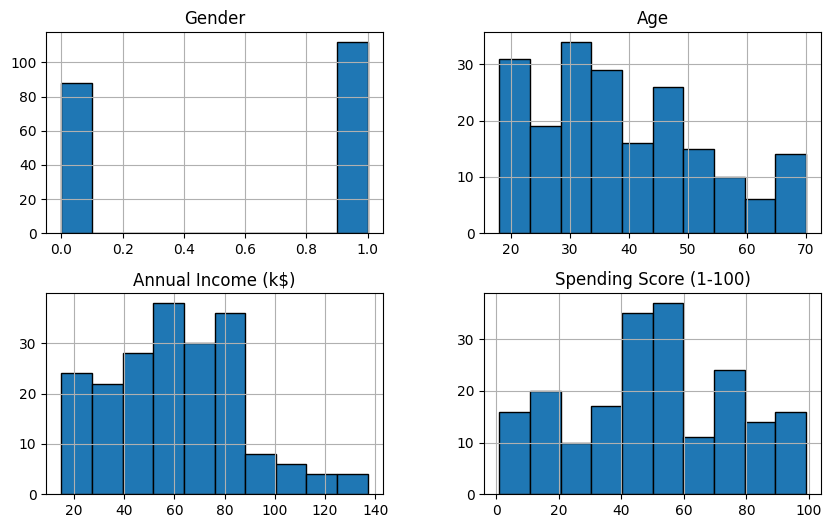

In [13]:
import matplotlib.pyplot as plt
df1.hist(figsize=(10,6), bins=10, edgecolor='k')
plt.show()

In [14]:
from sklearn.cluster import KMeans
wcss= []
 
for k in range(1,11):
    km= KMeans(n_clusters=k, random_state=42)
    km.fit(df1)
    wcss.append(km.inertia_)

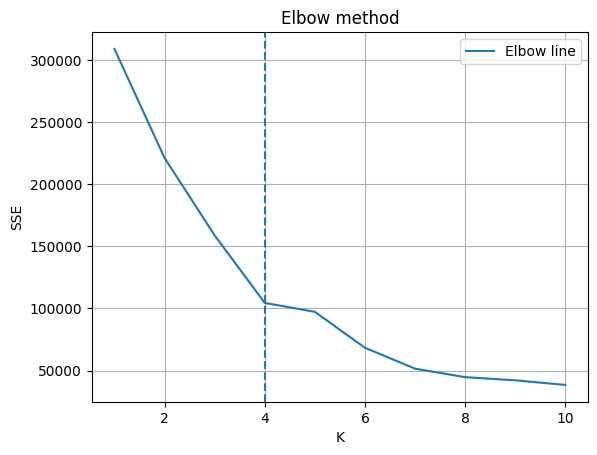

In [15]:
plt.plot(range(1,11), wcss, label='Elbow line')
plt.axvline(4, linestyle='--')
plt.xlabel('K')
plt.ylabel('SSE')
plt.grid()
plt.legend()
plt.title('Elbow method')
plt.show()

In [16]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [17]:
##Fit the Kmeans model on the data 
x= df1[['Annual Income (k$)', 'Spending Score (1-100)']]
Kmeans= KMeans(n_clusters=5, random_state=42) #init= 'k-means++'
Kmeans.fit(x)

KMeans(n_clusters=5, random_state=42)

In [18]:
Kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [19]:
pred= Kmeans.predict(x)
pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

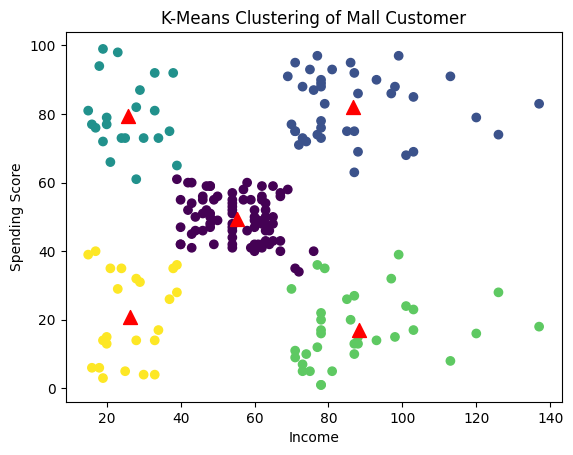

In [20]:
plt.scatter(x.iloc[:, 0], x.iloc[:,1], c=pred, cmap='viridis', marker='o')
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], s=100, c='red', marker='^')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering of Mall Customer')
plt.show()

In [21]:
from sklearn.metrics import silhouette_score
print(f"Silhouette_ Score", {silhouette_score(x, pred)})

Silhouette_ Score {np.float64(0.553931997444648)}


**Predicting for new data**

In [22]:
new_data= [[60, 50]]
predict_cluster= Kmeans.predict(new_data)
print(f"The new data {new_data} belongs to cluster {predict_cluster[0]}")

The new data [[60, 50]] belongs to cluster 0
